# **ICT303 - Advanced Machine Learning and Artificial Intelligence**
# **Lab 2 - Linear Neural Networks**

The goal of this lab is to learn how to implement, from scratch, the linear neuron (or linear regression model) that we covered in the lecture. We will particularly focus on creating all the building blocks involved in any machine learning model. These should include a class for managing the data, a class for the machine leanring model itself (The Model), a class responsible for training the model (The Trainer) and finally a main program that runs all the necessary tests.

While deep learning (and other) programming frameworks already provide ready-to-use implementations, implementing things from scratch is the only way to make sure that you
- understand the theoretical concepts,
- really know what you are doing,  
- can use efficiently these tools,
- understand their limitations, and
- can extend and build on the top of them.

We will first start with a naive approach that implements the analytical solution of the linear regression model and then solve the same problem by formulating it as a Neuron and train it on data.

In both cases:
- We will use synthetically-generated data and create a class called **SyntheticRegressionData** to manage the data.
- Create a class called **LinearRegression** that implements the machine learning model.
- Train the model using a class called **Trainer**.

This forms the standard standard machine learnin pipeline. This will give you an idea of what is involved in the implementation of machine learning models.

This lab is adapted from: https://d2l.ai/chapter_linear-regression/linear-regression-scratch.html

### **1. A short summary of linear regression**

Recall, from the lecture, that  regression is the problem of estimating the value of a variable (the output) $y$ as a function of $d$ variables (the input) \begin{align}
  \textbf{x} = \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{d}
         \end{bmatrix}.
\end{align}

In linear regression, this function, which defines the relation between the input $\textbf{x}$ and the output $y$, is linear. In other words:
\begin{equation}
y = w_1x_1 + w_2 x_2 + \cdots + w_dx_d + b = \sum_{i=1}^{d}w_ix_i + b,
\end{equation}

where:
- $b$ is a scalar called *bias*, and
- $w_1, \dots, w_d$ are scalar (real) values called *weights*.

The weights $w_1, \dots, w_d$  and the bias $b$ can be arranged into a single column vector of the form:
\begin{align}
  \textbf{W} = \begin{bmatrix}
           w_{1} \\
           w_{2} \\
           \vdots \\
           w_{d} \\
           b
         \end{bmatrix}.
\end{align}

This way, the linear regression equation above can be written using dot products between vectors:
$$
    y =  \begin{bmatrix}
            w_{1}, w_{2}, \dots, w_{d}, b
        \end{bmatrix}
       \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{d} \\
           1
         \end{bmatrix}.
$$

which can be written in a compact way as:
$$
y = \textbf{W}^{\top} \textbf{X} = \langle \textbf{W}, \textbf{X} \rangle.
$$

Note that here,
$$
  \textbf{X} =  \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{d} \\
           1
         \end{bmatrix}.
$$


$\textbf{W}$, which includes both the weights and the bias  and $b$, are called **parameters** of the model. The goal of the **training** process is to find the right values of these weights from some training data.

### **Example 1 - House prices** ###

House prices are affected by many factors. In this example, let's assume that they are affected by 3 factors (in this case $d = 3$):
- The surface of the livable area. Let's denote it by $x_1$,
- The land area. Let's denote it by $x_2$.
- The distance of the house to the train startion. Let's denote it by $x_3".

Let's denote by $y$ the house price.

We would like to develop a linear model that predicts the house price, i.e., the value of $y$ from these 3 parameters. Then, we can write:

$$
    y =  \begin{bmatrix}
            w_{1}, w_{2}, w_{3}, b
        \end{bmatrix}
       \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           x_{3} \\
           1
         \end{bmatrix} = w_1 x_1 +  w_2 x_2 + w_3 x_3 + b.
$$

In this formulation, we know the form of the relation between these parameters and the house price. Or, if we want to be correct, we assumed that the relation between the three factors and the house price is linear.  The problem, however, is that we do not know the exact values of the parameters $w_1, w_2, w_3$ and  $b$.

The goal of the training phase is to actually determine the correct values of $w_1, w_2, w_3$ and  $b$ from examples. In other words, we will go out, collect data about each house (the surface of their livable area, the total area of the land, and their distance to the train station) as well as their historical sale prices. Then, we use this data to estimate the values of $w_1, w_2, w_3$ and  $b$. When someone wants to sell their house, they only need to enter the surface of the livable area of the house, the total land area, and its distance to the train station. The model will then return the estimated sale price.

### **The training process** ###

The first step inthe t raining process is to collect training data. In the example above, the training data consists of a number $n$ of houses. For each house, we need to collect (1) the area of its liveable surface, its total area and its distance to the station, and (2) the corresponding sale price. The latter is called grundtruth.

In the general case, we need to collect:
-  $n$ input samples $\textbf{x}^1, \dots, \textbf{x}^n$. Each sample $\textbf{x}^i$ is a vector of the form:
  $$
    \textbf{x}^i = \begin{bmatrix}
           x^{i}_{1} \\
           x^{i}_{2} \\
           \vdots \\
           x^{i}_{d} \\
           1
         \end{bmatrix}.
  $$

Note that in the case of houses the $ d = 3 $ and $x^{i}{1}$  corresponds to the areaof the liveable space of the $i-$th house, $x^{i}_{2}$ corresponds to the total area of the $i-$th house and $x^{i}_{3}$ corresponds to the distance of the $i-$th house from the train station.

- For all the data we collected, we stack them into a single matrix $\textbf{X}$ of the form:
  $$
    \textbf{X} =
      \begin{bmatrix}
           x^{1}_{1} \cdots x^{i}_{1} \cdots x^{n}_{1} \\
           x^{1}_{2} \cdots x^{i}_{1} \cdots x^{n}_{2} \\
           \vdots \\
            x^{1}_{d} \cdots x^{i}_{d} \cdots x^{n}_{d}\\
            1 \cdots 1 \cdots 1
         \end{bmatrix}.
  $$


- For each sample $\textbf{x}^i$, we have its desired output $y^i$. In our example, $y^i$ is the historical sale price of the $i-$th house.  Let's put all the $y^i$'s into one column vector:
 $$
 \textbf{y} =  
  \begin{bmatrix}
      y_1 \\
      y_2\\
      \vdots \\
      y_n
  \end{bmatrix}
 $$


Then, we can write:
$$
\begin{bmatrix}
      y_1 \\
      y_2\\
      \vdots \\
      y_n
  \end{bmatrix} = \begin{bmatrix}
            w_{1}, w_{2}, \dots, w_{d}, b
        \end{bmatrix}  \begin{bmatrix}
           x^{1}_{1} \cdots x^{i}_{1} \cdots x^{n}_{1} \\
           x^{1}_{2} \cdots x^{i}_{1} \cdots x^{n}_{2} \\
           \vdots \\
            x^{1}_{d} \cdots x^{i}_{d} \cdots x^{n}_{d}\\
            1 \cdots 1 \cdots 1
         \end{bmatrix}.
$$

which can be written in short as:
$$
   \textbf{y} = \textbf{W}^\top \textbf{X}.
$$

Our goal is to find the values of $\textbf{W}$. There are two ways of solving this problem:
- Analytical (closed-form) solution, and
- Iteratvie optimization-based solution.

The former is only possible for simple problems such as the linear regression problem. The latter, on the other hand, is iterative but applicable to every machine learning problem.

This week, we will look at the first solution. First, we will see how we can generate some synthetic/simulated data (Section 2), which we will use to validate the solution. This will show you how to implement the class the handles data. Second, will create the model class and the trainer (Section 2) and implement all the necessary methods.



### **2. Generating synthetic data**

Machine learning is all about data. The data usually comes from practical problems. However, when developing machine learning models, we usually rely on synthetic data because:
- They are easy to generate, by just writing some code
- We know the input, the output, and  the process that generated them. Thus, we can easily evaluate whether our machine learning model works the way it is intended to.

Note, however, that synthetic data should not replace real data. Once a machine learning model has been developed and tested, it should be trained and testedt/validated on real data.

In the case of linear regression, we will need training data in the form of pairs $(\textbf{x}^i, y^i)$ where $\textbf{x}^i$ is an input and $y^i$ is its corresponding output (called also label). In this example, let's start with a simple case where $d=1$ and thus $\textbf{x}^i$ is a scalar (i.e., just one value).

Let's simulate $1000$ data points (i.e., $n=1000$). We generate each $\textbf{x}^i$ randomly from a normal (Gaussian) distribution with mean $0$ and standard deviation $0.01$ (any other values are also fine). Then, its corresponding output $y^i$ is  given by:
\begin{equation}
      y^i = \textbf{w}^\top \textbf{x}^i + b + \varepsilon.
\end{equation}

Here, $\varepsilon$ is an additive **noise** that corrupts the data generation process. (Think of a device that captures data where, during the capture process, the data gets corrupted with some noise.)

In this example, let's set
$$\textbf{w} = \begin{bmatrix}
     2 \\
     4.2
     \end{bmatrix}
$$

To generate this data, we will created  a class called **SyntheticRegressionData** whose responsibiity is to generate some synthetic data following the description above.

In this exercise, you are required to implement the method **generate**, which takes as input the mean mu, the standard deviation sigma, the noise value, and the number of training samples we want to generate. The generated data should be saved into variables X and y which should be members of the same class.  

In [ ]:
import torch
import numpy as np

class SyntheticRegressionData:

  # Implement the constructor of the class
  # We can assume that the constructor also generates some initial data
  def __init__(self): #, w, b, mu = 0.0, sigma = 1.0, noise=0.01, num_train=1000):
    # Generate num_train random samples following Gaussian distribution
    # of mean mu and standard deviation sigma.
    # [self.X, self.y ] = self.generate(mu, sigma, noise, num_train)
    self.n = 0;
    self.w = []
    self.b = []

  def generate(self, w, b, mu = 0.0, sigma = 1.0, noise=0.01, num_train=1000):

    '''
    Implement the function here

    self.X should be a matrix of size len(self.w) x num_train
    self.y should be a column vector of size num_train x 1
    '''
    np.random.seed(0)
    #temp_x = np.random.randint(-1000, 1000, size=(torch.numel(w), num_train))
    #self.X = torch.from_numpy(temp_x)

#    temp_y = np.random.randint(-1000, 1000, size=(num_train,1))
#   self.y = torch.from_numpy(temp_y)

    self.X = torch.rand(torch.numel(w), num_train)
    self.y = torch.rand(num_train, 1)

    return self.X, self.y

Below is an example of how to use the class to generate $n=1000$ data and plot them.

In [14]:
w = torch.tensor([2.0])
b = 4.2

noise = 1.2
mu = 0
sigma = 12

num_train = 1000  #I want to generate 1000 random houses

data_generator = SyntheticRegressionData()

X, y = data_generator.generate(w, b, mu=mu, sigma = sigma, noise = noise, num_train = num_train)

# Let's teh shape of X
print(X.shape)
print(y.shape)


TypeError: rand() received an invalid combination of arguments - got (builtin_function_or_method, int), but expected one of:
 * (tuple of ints size, *, torch.Generator generator, tuple of names names, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, torch.Generator generator, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)


Often, we need to **plot** or **visualize** the data instead of printing individual numerical values. Python offers a range of tools for plotting data and graphs. For instance, in the simple example above, we can use the **plot** function from **matloplib**:

Text(0.5, 1.0, 'Random data')

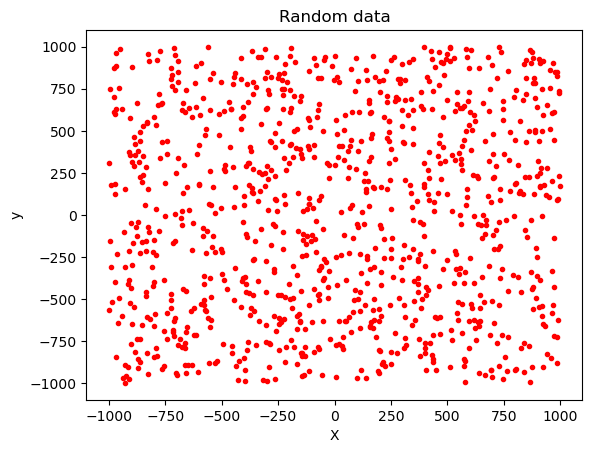

In [12]:
import matplotlib.pyplot as plt

# Plot as points in green
plt.plot(X, torch.transpose(y, 0, 1), 'r.')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random data')

**Questions:**


1. Play with the different parameters of the data generator and observe the plot that is generated.



In [ ]:
## Write the code here and test it

2. Can the class above be used to generate high dimensionial data, e.g., 2D or 3D points, or even points in nD? Write below the code of the extended class as well as the main program that tests it.

In [ ]:
## Write the code here and test it

### **3. Analytical solution to the linear regression problem**

Since this is a linear model, the solution has an analytical form. To simplify things, we add the bias $b$ to the vector $\textbf{W}$. Thus, in what follows, $\textbf{W} = (w_1, \dots, w_d, b)^\top$. We also add the element $1$ to each vector $\textbf{x}^i$. With this notation, the solution of the equation above, i.e., the best values of the parameters $\textbf{W}$, is given by:

$$
\textbf{W}^*  = (\textbf{X} \textbf{X}^\top)^{-1} \textbf{X} \textbf{y}.
$$

In the equation above:
- $\textbf{X}$ is a $(d+1) \times n$ matrix, where each column is a training sample with the value $1$ appended to it.
- $\textbf{X}^\top$ means the transpose of the matrix $\textbf{X}$.
- The $-1$ exponent means the inverse of a matrix.

#### **3.1. A simple implementation of the analytic solution**

 Using PyTorch, you are required to implement the analytical solution for the linear regression problem. We will then use the synthetic data generator we created above to test our solution.

In [ ]:
# Step 1 - Generate some synthetic data

'''
Write the code here
'''

# Step 2 - linear regression
# From this data, we need to estimate w and b - let's call them w_star and b_star
# Ideally, if our model is accurate, w_start and b_star should be equal to w and b, respectively
# The they are to w and b, the better is our solution

'''
Write the code here
'''

# Let's print the estimated parameeters as well as the real values of these paramters
# The estimated parameters should be close to the real values
print("Estimated W: ", w_star)
print("Estimate b: ", b_star)

# real values
print("Real W: ", w)
print("Real b: ", b)




#### **3.2. Analysis of the solution**

#### **Effect of the noise and number of samples**
In the code above, try the followings:
- Set the variable **noise** to $0$, and observe the results produced by the code.
- Increase the amount of noise in the generated synthetic data, i.e., by setting the variable **noise** to larger values, and observe the results produced by the code.
- vary the number of data elements **num_train** from a small number, e.g., 5, to a large number, e.g., 10000, and compare the results that you obtain.

What can you say about the accuracy? How is it affected by these parameters and why?

#### **Performance** ###

What do you think would be the issues with the solution above? Think of:
- The computation time: think first of what would be the issue and then test the code. You can add some code lines to check the computation time it takes to find te parameters $\textbf{w}$ and $b$,  
- The computation of the inverse of the matrix $\textbf{X} \textbf{X}^\top$. Does the inverse always exist? If no, in which conditions it would not exist?

#### **3.3. A Practical problem**

 We would like to write a code that predicts house prices based on their land **area** and **age**. We assume that the house price is a linear function of **area** and **age**.

Use the classes you created above to solve this problem. To test your solution, use the synthetic data generator class to simulate some data. For example, you can simulate data by calling the class **SyntheticRegressionData** with the parameters $w_1 = 100, w_2 = -5, b=100$.

Make sure you make the necessary changes to the solution above in order to solve this problem. However, when you make changes, make sure that the classes also work for the previous problem.

In [ ]:
## Create the necessary code here

### **4. A better implementation**

In the code above, we implemented the synthetic data generator as a class but the linear regression solver as part of the main code. In this exercise, let's also implement the solver as a class.




#### **4.1. The Model**

To do so, we will create a class called **LinearRegression**. It will have at least the following methods as members:
- The weights $\textbf{W}$ and bias $b$. When the class is created, these weights will be initialized to random values. Note that, in the current solution, these weights can be initialized to $0$. We will show later when using the general soluution, that initializing to $0$ is not a good idea.
- The method **forward**, which takes $\textbf{X}$ and computes its output $y$.

In [ ]:
class LinearRegression:
  def __init__(self, d=1):

    self.dim = d  # dimension of the data

    # Set the weights to random values from normal distribution of mean 0 and std 0.01
    self.w = torch.randn(self.dim, 1) * 0.01
    self.b = torch.randn(1, 1) * 0.01         # the bias

  # The forward function, which computes y for a given X
  def forward(self, X):

    '''
    This function  takes as input X and computes the output Y

    Provide the implementation here
    '''


    return y



#### **4.2. The Trainer**

Now we need to define the training class, i.e., the class that takes the generated data, and then it fits to it the LinearRegression model (i.e, estimates the optimal parameters of the linear regression). Let's call it **Trainer**, which has at least the following members:
- Method **fit()**, which takes as input the model (LinearRegression in our case) and the data (the synthetic data we generated in our case), and computes the optimal parameters **$\textbf{W}$** and **$b$** of the model.

In [ ]:
class Trainer:
  def __init__(self):
    return

  def fit(self, model, data):

    '''
    Implement the function here

    It takes the model and the data and should compute the weights W and the bias b, which are members of the mode
    '''

    return


#### **4.3. The main code**

Below is a script that shows how the classes above are used to solve the linear regression model.

In [ ]:
# 1. The data
d = 1   # dim of the data
w = torch.tensor([2.0])
b = 4.2
num_train = 1000000
noise = 1.2

data_generator = SyntheticRegressionData()
data_generator.generate(w, b, noise = noise, num_train = num_train)

print("The shape of the input data X and desired output y: ")
print(data_generator.X.shape)
print(data_generator.y.shape)



# 2. The model (linear regression)
model = LinearRegression(d)

# 3. The trainer
trainer = Trainer()

# 4. Estimate the parameters
trainer.fit(model, data_generator)

# 5. Get the results
w_star = model.w
b_star = model.b

# Let's see the estimated parameters
print("Estimated W: ", w_star)
print("Estimate b: ",  b_star)

# real values
print("Real W: ", w)
print("Real b: ", b)

Test the code above on multidimensional data (e.g., 2D or 3D).

### **5. Another problem**

Suppose now that the problem we would like to solve is:
$$
y = \sum_{i=1}^{d}w_ix_i^2 + b,
$$
where $x_i \in \mathbb{R}$, i.e., $x_i$'s are one-dimensinal scalars. How would you use the model you implemented above to solve this same problem with minimum extension?